# Lineare Regression

**Lineare Regression in der Vektorschreibweise:**  
$\hat y = h_{\theta}(\textbf{x})=\theta^{T}*\textbf{x}$

* $\theta$: Parametervektor mit Bias-Term (Achsenabschnitt) und der $\theta_{0}$ Gewichte aller Merkmale
* $\theta^{T}$: Zeilenvektor (transponiert) mit allen Merkmalsgewichten
* $\textbf{x}$: Zeilenvektor mit allen Merkmalen
* **Wichtig:** $x_{0}$ ist immer 1. Somit ist $\theta_{0}$ immer der Achsenabschnitt.
* $\theta^{T} * \textbf{x}$ ist das Skalarprodukt

Damit man das Modell trainieren (respektive die besten Werte für $\Theta$) ermitteln kann, braucht man ein Qualitätsmass für die Anpassung.
Häufig wird der RMSE (Root Mean Square Error) oder auch nur der MSE (Mean Square Error) verwendet.

$MSE(X, h_{\theta})=\frac{1}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})^2$

* $h_{\theta}$ sagt aus, dass das Modell durch den Vektor $\theta$ paramet

## Normalengleichung

Mit der Normalengleichung kann man einen Wert für $\theta$ finden, welcher die Kostenfunktion minimiert.

$\hat \theta = (X^{T}* X)^{-1} * X^{T} * y$

* $y$ ist der Vektor mit den Zielwerten (Labels)
* Das Hoch minus 1 macht die Matrix inversiv. Siehe: [Inverse Matrix](https://de.wikipedia.org/wiki/Inverse_Matrix)

In [24]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

Text(0,0.5,'$y$')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


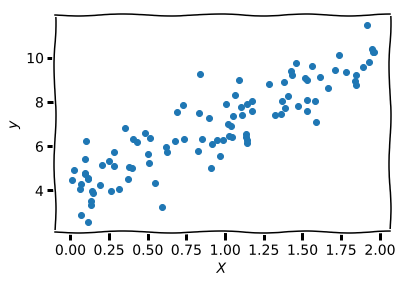

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd()

plt.scatter(X, y)
plt.xlabel('$X$')
plt.ylabel('$y$')

In [26]:
X.shape

(100, 1)

In [27]:
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_b = np.c_[np.ones((100,1)), X]
X_b.shape

(100, 2)

In [28]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06198158],
       [2.99727339]])

In [29]:
X_new = np.array([[0], [2]])
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [30]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06198158],
       [10.05652836]])

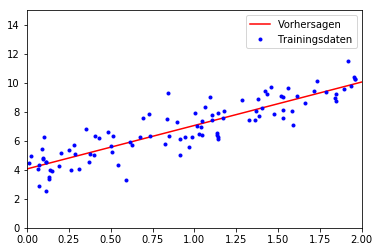

In [31]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend(["Vorhersagen", "Trainingsdaten"])
plt.show()

## Mit Sklearn

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(F'Achsenabweichung: {lin_reg.intercept_}\nGewichte: {lin_reg.coef_}')

Achsenabweichung: [4.06198158]
Gewichte: [[2.99727339]]


In [33]:
lin_reg.predict(X_new)

array([[ 4.06198158],
       [10.05652836]])

### Nachteil der Normalengleichung
Die Normalengleichung wird bei sehr vielen Merkmalen sehr langsam.

### Vorteil der Normalengleichung
Sie kann grosse Datensätze sehr effizient behandeln.  
Vorhersagen bei doppelt so vielen Datensätzen dauern nur etwa doppel so lange.

## Gradientenverfahren

Das Gradientenverfahren verändert die Parameter iterativ um so die Kostenfunktion zu minimieren.

1. $\theta$ wird mit Zufallszahlen befüllt (zufällige Initialisierung)
2. Die Parameter werden schrittweise verbessert um die Kostenfunktion zu senken
3. Der Algorithmus konvergiert bei einem Minimum

Die Lernrate (ein Hyperparameter) bestimmt die Grösse der Schritte:
* Bei einer zu kleinen Lernrate kann es sehr lange dauern, bis ein Minimum gefunden wird.
* Bei einer zu grossen Lernrate kann es passieren, dass nie das Minimum gefunden wird, da dieses ständig übersprungen wird.

MSE ist als Kostenfunktin für lineare Regressionsmodelle eine **konvexe Funktion**. Dies bedeutet, dass wenn man zwei beliebige Punkte auf der Kurve auswählt, ihre lineare Verbindung niemals die Kurve schneidet.

<img src="images/training_linear_models/konvex.png" alt="konvex function" width="400"/>

Somit hat die Kostenfunktion die Form einer Schüssel mit einem Minimum. Damit man dieses Minimum möglichst schnell findet, ist es wichtig, dass **alle Merkmale ähnlich skaliert sind**.
Dies macht die Schüssel schön rund, also zu einer Halbkugel. Bei unskalierten Merkmalen kann man sich auch eine Ellipse-artige Schüssel vorstellen, bei einer solchen kann es länger dauern, bis man das Minimum erreicht.

### Batch-Gradientenverfahren

Das Batch-Gradientenverfahren funktioniert mit partieller Ableitung. Es rechnet aus, wie stark sich die Kostenfunktion ändert, wenn man den Parameter $\theta_{j}$ ändert.

$$\frac{\delta}{\delta \theta_{j}} * MSE(X, h_{\theta})=\frac{2}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})x_{j}^{(i)}$$

Diese Ableitung wird aber nicht einzeln sondern gleich als Vektor für alle Modellparameter berechnet.

$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T*(X*\theta-y)$$

Mit dieser Formel kann man den Gradientenvektor ermitteln, der vom Minimum weg weist. Um sich dem Minimum zu nähern muss man also in die entgegengesetzte Richtung gehen. Dazu subtrahiert man $\nabla_{\theta}MSE(\theta)$ von $\theta$.
Die Lernrate $\eta$ bestimmt, wie gross die Schritte sein sollen.
$$\theta^{nächster Schritt}=\theta - \eta\nabla_{\theta}MSE(\theta)$$

> Das Batch-Gradientenverfahren ist bei grossen Datensätzen sehr langsam, dafür ist es geeignet bei vielen Merkmalen.

Mit Hilfe der Gittersuche kann eine geeignete Lernrate gefunden werden.  
Um die Anzahl Iterationen zu bestimmen kann man die Anzahl Iterationen auf einen sehr hohen Wert setzen und den Algorithmus anhalten, sobald der Gradientenvektor ganz klein wird. Der Gradientenvektor ist dann so klein, das er sich dem Minimum kaum noch nähern kann. Dies wird als Toleranz bezeichnet.

In [34]:
# Lernrate eta
eta = 0.1
n_iter = 1000
m = 100

In [35]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

for iteration in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [36]:
theta

array([[4.06198158],
       [2.99727339]])

### Stochastisches Gradientenverfahren

Das SGD (Stochastic Gradient Descent) wählt für jeden Schritt nur einen Datenpunkt zufällig aus. Dies macht ihn viel schneller als das Batch-Gradientenverfahren, aber durch seine Zufälligkeit hüpftf die Kostenfunktion ständig auf und ab und findet nie das perfekte Minimum.
> SGD lässt sich auch als Out-of-Core-Algorithmus implementieren

SGD kann durch die Zufälligkeit gut lokalen Minima entfliehen, kommt aber beim Minimum nie zur Ruhe.  
**Simulated Annealing:**  
Man wählt die Schritte zu Beginn gross um den lokalen Minima zu entfliehen und dann immer kleiner, damit der Algorithmus beim globalen Minima stehen bleibt.
Durch dieses "langsame Abkühlen" wird ein bestmögliches Resultat erzielt.

**Learning Schedule:**  
Dies ist die Funktion zum festlegen der Lernrate.

In [37]:
n_epochs = 50
# Hyperparameter für den Learning Schedule
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

In [38]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

In [39]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [40]:
theta

array([[4.0447901 ],
       [2.99813926]])

### Mit Sklearn

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(F'Achsenabweichung: {sgd_reg.intercept_}\nGewichte: {sgd_reg.coef_}')

Achsenabweichung: [4.05680318]
Gewichte: [2.97743512]


### Mini-Batch-Gradientenverfahren

Dies ist eine Kombination des Batch- und des stochastische Gradientenverfahrens. Es werden anstatt nur ein zufälliger Datenpunkt, eine selbst festgelegte Menge an zufällig gewählten Datenpunkten gewählt. Somit muss nicht bei jedem Durchlauf der gesamte Datensatzt verwendet werden aber es ist auch nicht so stark flukturierend wie wenn nur ein einziger Datenpunkt gewählt wird.

# Polynomielle Regression

Auch wenn die Daten nicht linear sind, kann man sie trotzdem mit einem Linearen Modell verwenden. Dazu fügt man den Daten einfach ein weiteres vom ersten Merkaml abhängiges Merkmal hinzu.

## Mit Sklearn
Man kann PolynomialFeatures von sklearn verwenden, um ein weitere Merkmale aus den bestehnden zu erzeugen. `degree=2` steht für das Quadrat (Polynom 2. Grades).

**Achtung:**  
Wenn man bereits mehrere Merkmale hat und einen hohes Polynom wählt, so wächst die Anzahl Merkmale explosionsartig!

In [42]:
m = 100
# Nicht lineare Daten
X = 6 * np.random.rand(m, 1) - 3
# Quadratische Gleichung y = ax^2 + bx + c
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Erstes Merkmal ist immer 1:  
(Beachte das oben künstlich eingefügte Rauschen: `np.random.randn(m, 1)`)  
$y = 0.5^2 + x + 2.0$

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.32197279])

In [44]:
X_poly[0]

array([-0.32197279,  0.10366648])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(F'Achsenabweichung: {lin_reg.intercept_}\nGewichte: {lin_reg.coef_}')

Achsenabweichung: [2.06965238]
Gewichte: [[0.96684438 0.48716201]]


$y = 0.451^2 + 1.146* x + 2.056$  
$y = 0.5^2 + x + 2.0$

# Lernkurven

Um Overfitting oder Underfitting zu erkennen, kann man wie in Kapitel 2 eine Kreuzvalidierung durchführen und die Verallgemeinerungsleistung abschätzen:
* Das Modell verallgemeinert sehr gut bei den Trainingsdaten, aber schlecht bei den Validierungsdaten
    * Overfitting
* Das Modell verallgemeinert bei Trainings- und Validierungsdaten schlecht
    * Underfitting

Eine andere Möglichkeit Under- und Overfitting zu erkennen sind **Lernkurven**.

Eine Lernkurve zeigt die Leistung bei den Trainings- und Validierungsdaten abhängig von der Grösse der Trainingsdaten.

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    # Damit nur das wichtige Angezeigt wird
    plt.ylim(0, 5)
    plt.legend()
    pass

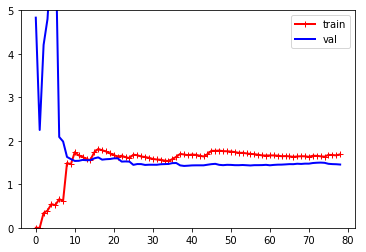

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* Am Anfang ist die Lernkurve bei den Validierungsdaten sehr schlecht (hoch), da es mit wenigen Daten schlecht verallgemeinern kann.
* Bei den Trainingsdaten ist sie bei wenigen Daten hingegen sehr gut (tief), da es auf die wenigen Daten die es erst kennt, sehr gut vorhersagen kann.

### Underfitting
Wenn die Lernkurve beider Datensätze ein Plateau erreichen und weit oben liegen, dann liegt Underfitting vor.

**Beheben:**  
Underfitting kann man nicht mit mehr Daten beheben. Da die Daten zu komplex sind für das Modell muss ein komplexeres Modell gewählt werden.

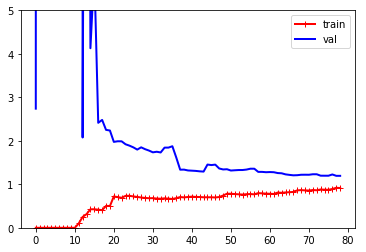

In [84]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

* Der Fehler auf den Trainingsdaten ist kleiner als beim Linearen Modell
* Es gibt eine grosse Lücke zwischen Trainings- und Validierungsfehler

### Overfitting
Die grosse Lücke zwischen Trainings- und Validierungsfehler besteht wegen dem Overfitting.

**Beheben:**  
Overfitting kann man unter anderem beheben, indem man solange mehr Trainingsdaten bereitstellt, bis der Validierungsfehler dem Trainingsfehler entspricht.

## Das Gleichgewicht zwischen Bias und Varianz
### Verallgemeinerungsfehler
Man setzt den Verallgemeinerungsfehler eines Modells aus der Summe folgender Komponenten zusammen:

**Bias:**  
Bias wird durch falsche Annahmen auf die Daten verursacht. Wenn man etwa Annimmt, dass die Daten linear sind, obwohl sie quadratisch wäre, steigt das Bias.
Ein Modell mit hohem Bias underfitted die Trainingsdaten sehr wahrscheinlich.

**Varianz:**  
Wenn das Modell zu empfindlich für die Daten ist, so steigt die Varianz. ein Modell mit hoher Varianz overfitted die Trainingsdaten eher.

**Nicht reduzierbare Fehler:**  
Diese Fehler werden durch das Rauschen in den Daten oder fehlerhafte Daten verursacht. Um diesen Fehler zu verhindern, muss man die Trainingsdaten bereinigen und gut aufbereiten.

# Regularisierte lineare Modelle

Eine weitere Methode um Overfitting entgegenzuwirken ist es, das Modell zu regulieren/einschränken.

## Ridge-Regression

Man addiert dazu einen Regulierungsterm der Kostenfunktion hinzu. Dieser soll allerdings nur beim Trainieren zur Kostenfunktion addiert werden, nicht beim evaluieren der Leistung eines trainierten Modells!
Es ist oft so, dass die Kostenfunktion beim Trainieren sich vom Qualitätsmass unterscheidet.

**Regularisierungsterm:**  
$\alpha\sum_{i=1}^n\theta_i^2$

Je höher $\alpha$ gewählt ist, desto stärker ist das Modell regularisiert. (Desto näher sind die Gewichte bei null)

**Kostenfunktion:**  
$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n\theta_i^2$

**Wichtig:**  
* $\theta_0$ wird nicht regularisiert. ($i=1$)
* Die Daten sollten vor einer Regularisierung skaliert werden

**Geschlossene Form der Ridge-Regression:**  
$\hat\theta = (X^T * X + \alpha A)^{-1} * X^T * y$
* $A$ ist eine Identitätsmatrix

In [90]:
from sklearn.linear_model import Ridge
ridge_reg =  Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.96341543]])

In [100]:
# Penalty l2 entspricht der Ridge-Regression
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.89803181])

## Lasso-Regression
> Least Absolute Shrinkage and Selection Operator Regression

**Kostenfunktion:**  
$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n|\theta_i|$

**Wichtig:**  
Die Lasso-Regression eliminiert die am wenigsten relevanten Merkmale komplett. (Sie werden auf 0 gesetzt)

In [95]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.91378058])

In [96]:
# Penalty l1 entspricht der Lasso-Regression
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.87934362])

## Elastic Net
Elasitc Net ist lediglich eine Mischung aus den Ridge- und der Lasso-Regularisierungstermen. Mit dem Parameter $r$ kann das Mischverhältniss festgelegt werden:
* $r=0$ -> Ridge
* $r=1$ -> Lasso

In [99]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.91725327])

## Wann soll welche Regularisierung verwendet werden?
Man sollte nie eine Lineare Regression ohne Regularisierung verwenden.
Grundsätzlich kann man Ridge verwenden. Wenn man jedoch vermutet, dass einige Merkmale unwichtig sind, so sollte man Elastic Net oder Lasso verwenden. Hier gilt es grundsätzlich Elastic Net Lasso vorzuziehen, da sich Lasso sprunghaft verhalten kann, wenn verschiedene Merkmale miteinander korrelieren oder es mehr Merkmale als Datenpunkte gibt.

## Early Stopping
Die wohl einfachste Art der Regularisierung ist es, das Training zu stoppen, sobald der Validierungsfehler ein Minimum erreicht hat.

### Beim stochastischen- und Mini-Batch-Gradientenverfahren
Bei diesen Verfahren, sind die Kurvenverläufe nicht immer so glatt und es kann daher schwierig sein zu erkennen, ob nun das Minimum erreicht wurde.
Um dies zu umgehen, trainiert man einfach noch ein wenig weiter und beobachtet, ob der Fehler eine Weile oberhalb des Minimums bleibt. Ist dies der Fall, setzt man die Modellparameter wieder auf den Stand, an dem der Validierungsfehler minimal war.

In [140]:
# Daten immer skalieren
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [141]:
X_poly_scaled[:2]

array([[-0.0577411 , -1.1502517 ],
       [-1.47517357,  1.80405634]])

In [142]:
X_poly[:2]

array([[-0.32197279,  0.10366648],
       [-2.83870119,  8.05822444]])

In [153]:
from copy import deepcopy

# warm_start=True -> die Methode fit() trainiert das bestehende Modell mit den neuen Daten weiter, anstatt von vorne zu beginnen.
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

X_train_poly_scaled, X_val_poly_scaled, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # deepcopy kopiert auch die Daten (Trainiertes Modell) während sklearn.base.clone ohne Daten kopiert.
        best_model = deepcopy(sgd_reg)

print(best_epoch)
best_model.predict([[1.5]])

90


array([5.08208783])

In [154]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)